# Survey Analysis

We often want to survey people on their views or reactions to possible events (design or promotion, for example). There are many survey tools that are good in designing the survey, presenting it on various forms, such as web or mobile, distributing it and collecting the responses. However, when it comes to analyzing the responses, you are left with fewer options, and most of them are out-dated (SPSS, for example).

In this notebook, we will explore how to analyze survey's responses, including statistical tests for reliability and research hypothesis. 

We will start with loading the CSV files that we exported from the survey system (Qualtrics, in this example).

In [2]:
import pandas as pd

In [3]:
survey_df = pd.read_csv('../data/survey_results.csv')

## Survery Overview

We can explore the number of questions and answers with _info_

In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              97 non-null     object
 1   EndDate                97 non-null     object
 2   Status                 97 non-null     object
 3   IPAddress              97 non-null     object
 4   Progress               97 non-null     object
 5   Duration (in seconds)  97 non-null     object
 6   Finished               97 non-null     object
 7   RecordedDate           97 non-null     object
 8   ResponseId             97 non-null     object
 9   RecipientLastName      1 non-null      object
 10  RecipientFirstName     1 non-null      object
 11  RecipientEmail         1 non-null      object
 12  ExternalReference      1 non-null      object
 13  LocationLatitude       97 non-null     object
 14  LocationLongitude      97 non-null     object
 15  DistributionChannel    97

## Cliping outliers

We want to remove outliers to avoid issues from people answering too quick or too slow. Let's calculate the 0.05 and 0.95 percentiles of the data:

In [5]:
(
    survey_df
    .loc[1:,['Duration (in seconds)']]
    .astype(int)
    .quantile([0.05, 0.95])
)

,Duration (in seconds)
0.05,87.25
0.95,1171.00


And now we can clip the data to be above 90 and below 1,100

In [6]:
valid_survey_df = (
    survey_df
    .loc[1:,:]
    .assign(duration = lambda x : pd.to_numeric(x['Duration (in seconds)']))
    .query("duration > 90 and duration < 1100")
)
valid_survey_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Offering1,Offering2,Offering3,Gender,Age,Education,Region,Q53,Random ID,duration
1,2/19/2021 3:28:19,2/19/2021 3:30:28,IP Address,47.35.194.33,100,129,True,2/19/2021 3:30:29,R_2WUYft76PXR2zBS,NaN,...,3,4,2,Female,40-50,Bachelor’s degree,North America,IM_6m0pkPqaVoiPxY1,58834,129
2,2/19/2021 3:28:16,2/19/2021 3:30:36,IP Address,151.65.216.111,100,140,True,2/19/2021 3:30:37,R_3eq8jucMfNqn5A4,NaN,...,5,5,3,Male,18-28,Bachelor’s degree,Europe,IM_6m0pkPqaVoiPxY1,21882,140
3,2/19/2021 3:29:12,2/19/2021 3:31:01,IP Address,73.176.57.130,100,108,True,2/19/2021 3:31:01,R_1jOnl4rE5r7qMcE,NaN,...,Very likely\n7,6,6,Male,29-39,Bachelor’s degree,North America,IM_6m0pkPqaVoiPxY1,59587,108
4,2/19/2021 3:29:18,2/19/2021 3:31:07,IP Address,86.106.87.89,100,109,True,2/19/2021 3:31:07,R_BxBBo8wdgckIP7j,NaN,...,4,5,Very influential\n7,Male,29-39,Bachelor’s degree,South America,IM_6m0pkPqaVoiPxY1,52402,109
5,2/19/2021 3:29:06,2/19/2021 3:31:28,IP Address,27.57.12.252,100,142,True,2/19/2021 3:31:29,R_2ea55lhudZuzX2J,NaN,...,5,5,4,Male,29-39,Master Degree,Asia,IM_6m0pkPqaVoiPxY1,64888,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2/19/2021 4:01:13,2/19/2021 4:15:24,IP Address,117.199.129.182,100,850,True,2/19/2021 4:15:24,R_3HXHwga41cOCWJ3,NaN,...,6,5,Very influential\n7,Female,29-39,Bachelor’s degree,Asia,IM_6m0pkPqaVoiPxY1,23065,850
93,2/19/2021 4:05:50,2/19/2021 4:15:54,IP Address,196.18.164.102,100,604,True,2/19/2021 4:15:55,R_2sTpV27TMoq55Nj,NaN,...,5,5,5,Female,+62,Bachelor’s degree,North America,IM_6m0pkPqaVoiPxY1,56488,604
94,2/19/2021 4:14:37,2/19/2021 4:17:39,IP Address,70.39.92.10,100,181,True,2/19/2021 4:17:39,R_10IT3z1yGSWIddU,NaN,...,Very likely\n7,Very probable\n7,Very influential\n7,Female,29-39,Bachelor’s degree,North America,IM_6m0pkPqaVoiPxY1,10094,181
95,2/19/2021 4:10:47,2/19/2021 4:18:35,IP Address,182.65.119.175,100,467,True,2/19/2021 4:18:35,R_2q9815sUara9kKO,NaN,...,6,Very probable\n7,Very influential\n7,Female,29-39,Master Degree,Asia,IM_6m0pkPqaVoiPxY1,88800,467


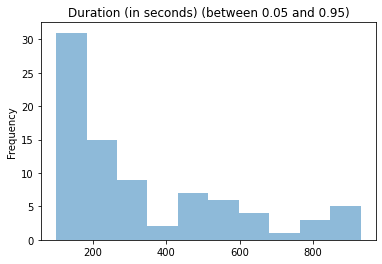

In [7]:
(
    valid_survey_df
    ['duration']
    .plot(
        kind='hist', 
        alpha=0.5, 
        title='Duration (in seconds) (between 0.05 and 0.95)'
    )
);

## Map of responders

Most of the survey tools are also reporting regarding the location of the responders with their location information. This survey also has this data in _LocationLongitude_ and _Locationlatitude_ columns. We can use the popular GeoPandas package to show them over the world map. 

* Create from GeoPandas
* a geo-location data frame
* based on the survey table above
* Use the geometry information to draw points based on 
* $x$ as location longitude, and
* $y$ as location latitude

In [8]:
import geopandas
import matplotlib.pyplot as plt

gdf = (
    geopandas
    .GeoDataFrame(
        valid_survey_df, 
        geometry=geopandas.points_from_xy(
            valid_survey_df.LocationLongitude, 
            valid_survey_df.LocationLatitude)
        )
)

* Create a map of the world based on the built-in map from GeoPandas
* Plot the background map with 
* while background and
* black lines
* and the locations of the responders in red
* Set the title of the map to "Survey Reponders Locations"

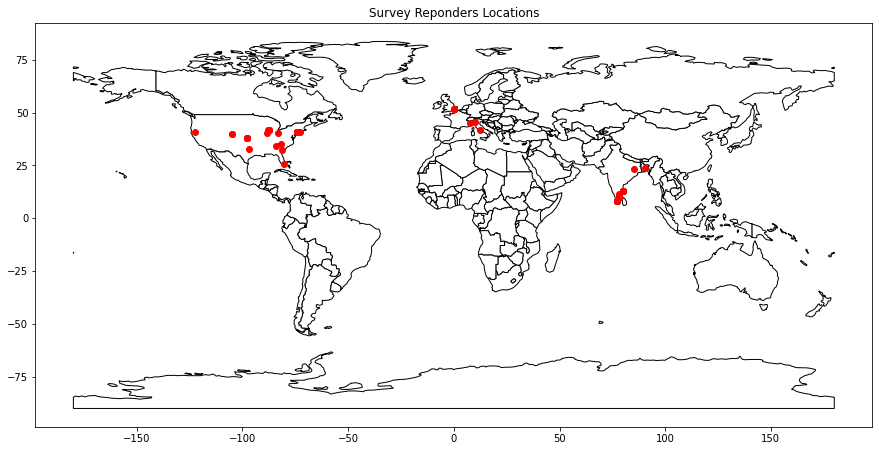

In [9]:
world = (
    geopandas
    .read_file(
        geopandas
        .datasets
        .get_path('naturalearth_lowres')
    )
)

gdf.plot(
    ax=(
        world
        .plot(
            color='white', 
            edgecolor='black',
            figsize=(15,10)
        )
    ), 
    color='red',
    
).set_title("Survey Reponders Locations");

## Personality Score

The first part of the survey was a personality score that we need to analyze to build the score of each responder. We can find the psychology test format in a previous reserach:

## Mini-IPIP test questions

Based on: "The Mini-IPIP Scales: Tiny-Yet-Effective Measures of the Big Five Factors of Personality" 

{cite}`mini_ipip2006`

Appendix 20-Item Mini-IPIP


| Item | Factor | Text |
| --- | ---  | --- |
| 1 | E | Am the life of the party. |
| 2 | A | Sympathize with others’ feelings |
| 3 | C | Get chores done right away. |
| 4 | N | Have frequent mood swings. |
| 5 | I | Have a vivid imagination. |
| 6 | E | Don’t talk a lot. (R) |
| 7 | A | Am not interested in other people’s problems. (R) |
| 8 | C | Often forget to put things back in their proper place. (R)|
| 9 | N |  Am relaxed most of the time. (R) |
| 10 | I | Am not interested in abstract ideas. (R) |
| 11 | E | Talk to a lot of different people at parties. |
| 12 | A | Feel others’ emotions. |
| 13 | C | Like order. |
| 14 | N | Get upset easily. |
| 15 | I | Have difficulty understanding abstract ideas. (R) |
| 16 | E | Keep in the background. (R) |
| 17 | A | Am not really interested in others. (R) |
| 18 | C | Make a mess of things. (R) |
| 19 | N | Seldom feel blue. (R) |
| 20 | I | Do not have a good imagination. (R) |











First, let's get the questions that are written in the first line (index=0) of the table. We want the 20 questions from index 18 to index 38.

In [10]:
(
    survey_df
    .iloc[0,18:38]
)

E1                              Am the life of the party.
A2                      Sympathize with others' feelings.
C3                            Get chores done right away.
N4                             Have frequent mood swings.
I5                              Have a vivid imagination.
E6R                                     Don't talk a lot.
A7R         Am not interested in other people's problems.
C8R     Often forget to put things back in their prope...
N9R                          Am relaxed most of the time.
I10R                 Am not interested in abstract ideas.
E11         Talk to a lot of different people at parties.
A12                                Feel others' emotions.
C13                                           Like order.
N14                                     Get upset easily.
I15R        Have difficulty understanding abstract ideas.
E16R                              Keep in the background.
A17R                  Am not really interested in others.
C18R          

Let's check how the results look like in the table:

In [11]:
survey_df.E1

0     Am the life of the party.
1          Strongly Disagree\n1
2          Strongly Disagree\n1
3             Somewhat agree\n4
4             Somewhat agree\n4
                ...            
92            Somewhat agree\n4
93         Strongly Disagree\n1
94            Somewhat agree\n4
95         Strongly Disagree\n1
96            Strongly agree\n5
Name: E1, Length: 97, dtype: object

We see that we have five personality traits that we are measuring with these questions: E, A, C, N, I.
* Create a variable for each personality trait above
* Convert each question to its relevant trait by taking the numertic score at the last character of the question as an Integer, and add it to the relevant trait score. Note that some of the scores are reversed and you need to add the reversed score (6 - score, for a 1-5 score as we have here)

In [12]:
survey_ipip_df = (
    valid_survey_df
    .assign(E = 0)
    .assign(A = 0)
    .assign(C = 0)
    .assign(N = 0)
    .assign(I = 0)
    .assign(E = lambda x : x.E + x.E1.str[-1:].astype(int))
    .assign(A = lambda x : x.A + x.A2.str[-1:].astype(int))
    .assign(C = lambda x : x.C + x.C3.str[-1:].astype(int))
    .assign(N = lambda x : x.N + x.N4.str[-1:].astype(int))
    .assign(I = lambda x : x.I + x.I5.str[-1:].astype(int))
    .assign(E = lambda x : x.E + 6 - x.E6R.str[-1:].astype(int))
    .assign(A = lambda x : x.A + 6 - x.A7R.str[-1:].astype(int))
    .assign(C = lambda x : x.C + 6 - x.C8R.str[-1:].astype(int))
    .assign(N = lambda x : x.N + 6 - x.N9R.str[-1:].astype(int))
    .assign(I = lambda x : x.I + 6 - x.I10R.str[-1:].astype(int))
    .assign(E = lambda x : x.E + x.E11.str[-1:].astype(int))
    .assign(A = lambda x : x.A + x.A12.str[-1:].astype(int))
    .assign(C = lambda x : x.C + x.C13.str[-1:].astype(int))
    .assign(N = lambda x : x.N + x.N14.str[-1:].astype(int))
    .assign(I = lambda x : x.I + 6 - x.I15R.str[-1:].astype(int))
    .assign(E = lambda x : x.E + 6 - x.E16R.str[-1:].astype(int))
    .assign(A = lambda x : x.A + 6 - x.A17R.str[-1:].astype(int))
    .assign(C = lambda x : x.C + 6 - x.C18R.str[-1:].astype(int))
    .assign(N = lambda x : x.N + 6 - x.N19R.str[-1:].astype(int))
    .assign(I = lambda x : x.I + 6 - x.I20R.str[-1:].astype(int))
    .assign(E = lambda x : x.E / 4)
    .assign(A = lambda x : x.A / 4)
    .assign(C = lambda x : x.C / 4)
    .assign(N = lambda x : x.N / 4)
    .assign(I = lambda x : x.I / 4)
)

### Personality Trait Visualization

We can show a quick histogram of one or two of the traits

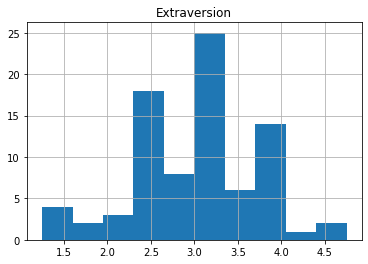

In [13]:
(
    survey_ipip_df
    .E
    .hist()
).set_title("Extraversion");

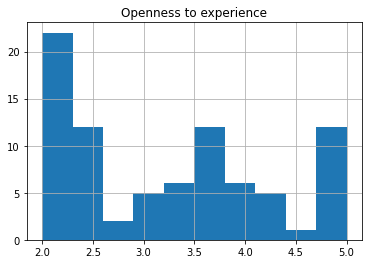

In [14]:
(
    survey_ipip_df
    .I
    .hist()
).set_title("Openness to experience");

## Random Groups

Many tests are using split to random groups to check the effect of a treatment on one of the group, while using the other group as a control group (or any other similar test method). In the survey, the group will be visible with answers on some of the questions, while other groups will answer different questions. In this survey, there were two groups that were assigned randomaly question 71 or question 73.

* Create a new column in the table called _group_
* create the first condition to have an answer (not null) in Q71 column
* create the second condition to have an answer in Q73 column
* assign the group value to be _'Group A'_ for the first condition
* assign the group value to be _'Group B'_ for the second condition
* assign a default value _'Unknown'_ if none of the condition is mapped

In [15]:
import numpy as np
survey_ipip_df['group'] = np.select(
    [
        survey_ipip_df['Q71_Page Submit'].notnull(), 
        survey_ipip_df['Q73_Page Submit'].notnull(), 
    ], 
    [
        'Group A', 
        'Group B'
    ], 
    default='Unknown'
)

## Research questions

The third part is the research questions part, where we want to test the impact of the treatment on the answers to these questions. From the list of columns in the table that we did in the beginning we see that these are starting with _'Expectation1'_, and ends with _'Offering3'_

In [16]:
survey_questions = (
    survey_df
    .loc[0,'Expectation1':'Offering3']
)
survey_questions

Expectation1          The chatbot's messages met my expectations.
Expectation2    The chatbot's messages corresponded to how I e...
Trust1                  The bike chatbot seemed to care about me.
Trust2                        The bike chatbot made me feel good.
Trust5             I believe the bike chatbot was honest with me.
Trust6          I believe the bike chatbot didn’t make false c...
Trust7                 I believe the bike chatbot is trustworthy.
Trust8                                  I trust the bike chatbot.
Trust9              The bike chatbot seemed adequate to my needs.
Expectation3             The chatbot's messages were appropriate.
Offering1       What is the likelihood that you would accept t...
Offering2       How probable is it that you would accept the c...
Offering3       How influential do you perceive the chatbot’s ...
Name: 0, dtype: object

* Convert all the values of these questions to numeric values based on the last characters ([-1:]) of the answer and set its type to be Interger

In [17]:
numeric_survey_ipip_df = (
    survey_ipip_df
    .apply(lambda x: 
        x.str[-1:].astype(int) 
        if x.name.startswith('Expectation') 
        else x
    )
    .apply(lambda x: 
        x.str[-1:].astype(int) 
        if x.name.startswith('Trust') 
        else x
    )
    .apply(lambda x: 
        x.str[-1:].astype(int) 
        if x.name.startswith('Offering') 
        else x
    )
)

## Testing Reliability with Cronback-Alpha

A common test to check the reliability of the answers is to test them using Cronback-alpha test. We expect that all the questions that are related to _Trust_, for example, will have a high correlation, and therefore a cronbach-alpha score that is higher than 0.7.

First, let's install a python library with cronbach-alpha function in it. 

In [18]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pingouin as pg

Now, let's take the set of questions for each variable (_Expectation_, _Trust_, and _Offering_ in this survey) and calculate their score:

In [20]:
pg.cronbach_alpha(data=
    numeric_survey_ipip_df
    .loc[:,
        ['Expectation1','Expectation2','Expectation3']
    ]
)

(0.7635463917525773, array([0.659, 0.84 ]))

In [21]:
pg.cronbach_alpha(data=
    numeric_survey_ipip_df
    .loc[:,
        ['Trust1','Trust2','Trust5','Trust6','Trust7','Trust8','Trust9']
    ]
)

(0.7665523059220511, array([0.681, 0.836]))

In [22]:
pg.cronbach_alpha(data=
    numeric_survey_ipip_df
    .loc[:,
        ['Offering1','Offering2','Offering3']
    ]
)

(0.7863454562366292, array([0.692, 0.855]))

### Calculate the research variables

Now that we see that the reliability of the question is good enough (>0.7), we can calculate the average score of each of these questions sets. We will use _eval_ function to do it:

In [23]:
summary_numeric_survey_df = (
    numeric_survey_ipip_df
    .eval("Expectation = (Expectation1 + Expectation2 + Expectation3) / 3")
    .eval("Offering = (Offering1 + Offering2 + Offering3) / 3")
    .eval("Trust = (Trust1 + Trust2 + Trust5 + Trust6 + Trust7 + Trust8 + Trust9) / 7")
)

In [24]:
(
    summary_numeric_survey_df
    .group
    .unique()
)

array(['Group B', 'Group A'], dtype=object)

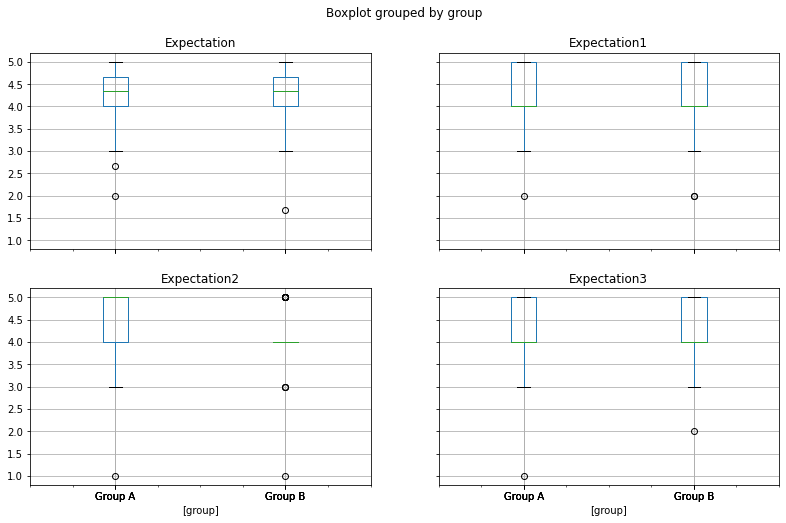

In [25]:
(
    summary_numeric_survey_df
    [['Expectation','Expectation1','Expectation2','Expectation3','group']]
    .boxplot(by='group', figsize=(13,8))
);

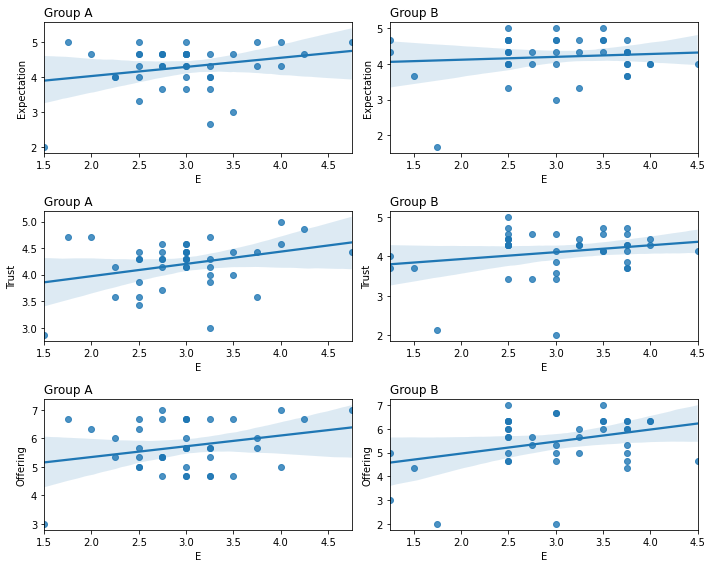

In [26]:
import seaborn as sns
### PLOT BUILD
fig, ax = plt.subplots(3, 2, figsize=(10,8))

for idx, attribute in enumerate(['Expectation','Trust','Offering']):
    for i,group in enumerate(sorted(summary_numeric_survey_df.group.unique())):
        sub_df = summary_numeric_survey_df.query('group == @group')
        sns.regplot(x=sub_df.E, y=sub_df[attribute], ax=ax[idx,i])
        ax[idx,i].set_title(group, loc='left')

fig.tight_layout()

plt.show()

## Anova 

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for attribute in ['Expectation','Trust','Offering']:
    print(attribute)
    model = ols(
        f'{attribute} ~ C(group) * E', 
        data=summary_numeric_survey_df
        .loc[:,['E',attribute,'group']]
    ).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    display(summary_numeric_survey_df.anova(dv=attribute, between=['group','E']).round(3))

Expectation


,sum_sq,df,F,PR(>F)
C(group),0.188292,1.0,0.479798,0.490545
E,0.960168,1.0,2.446659,0.121772
C(group):E,0.315844,1.0,0.804820,0.372382
Residual,31.002798,79.0,NaN,NaN


/Users/guy/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,Source,SS,DF,MS,F,p-unc,np2
0,group,2.738,1.0,2.738,10.734,0.002,0.154
1,E,2069.063,14.0,147.790,579.413,0.000,0.993
2,group * E,35.160,14.0,2.511,9.846,0.000,0.700
3,Residual,15.049,59.0,0.255,NaN,NaN,NaN


Trust


,sum_sq,df,F,PR(>F)
C(group),0.198562,1.0,0.731283,0.395054
E,1.546282,1.0,5.694801,0.019408
C(group):E,0.030313,1.0,0.111641,0.739169
Residual,21.450497,79.0,NaN,NaN


/Users/guy/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,Source,SS,DF,MS,F,p-unc,np2
0,group,2.673,1.0,2.673,14.043,0.0,0.192
1,E,1980.174,14.0,141.441,743.184,0.0,0.994
2,group * E,26.872,14.0,1.919,10.085,0.0,0.705
3,Residual,11.229,59.0,0.190,NaN,NaN,NaN


Offering


,sum_sq,df,F,PR(>F)
C(group),1.381213,1.0,1.421506,0.236725
E,8.083278,1.0,8.319086,0.005054
C(group):E,0.158976,1.0,0.163614,0.686944
Residual,76.760714,79.0,NaN,NaN


/Users/guy/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,Source,SS,DF,MS,F,p-unc,np2
0,group,9.509,1.0,9.509,11.908,0.001,0.168
1,E,3593.710,14.0,256.694,321.460,0.000,0.987
2,group * E,62.507,14.0,4.465,5.591,0.000,0.570
3,Residual,47.113,59.0,0.799,NaN,NaN,NaN


In [28]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(summary_numeric_survey_df['E'],summary_numeric_survey_df['Trust'])
print(fvalue, pvalue)

147.41775587209213 1.3074590620296686e-24


## Graphs of all questions

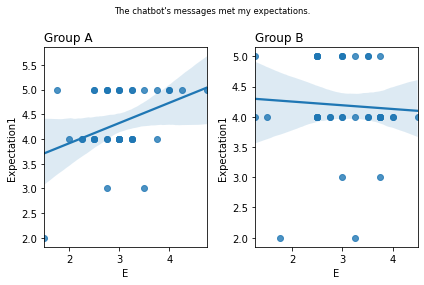

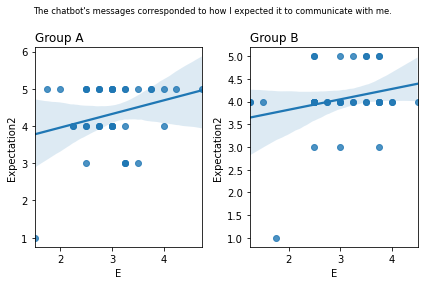

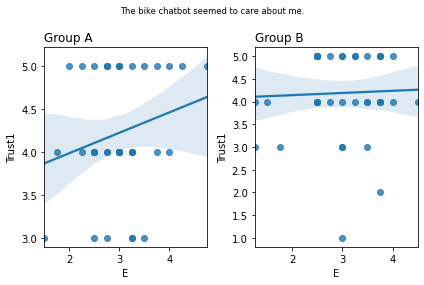

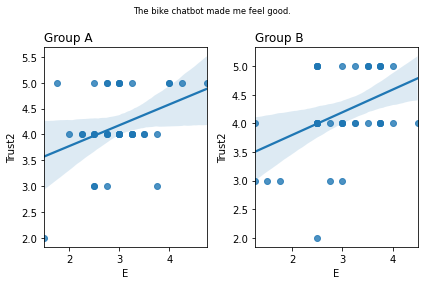

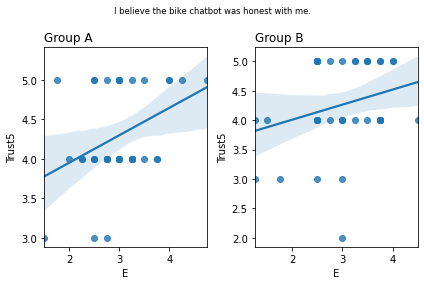

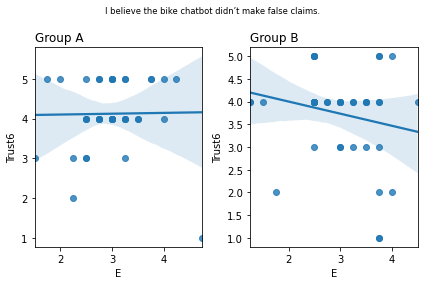

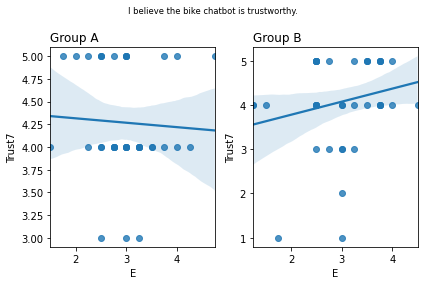

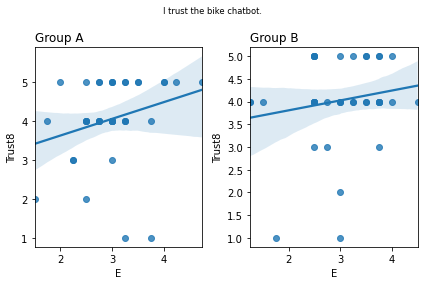

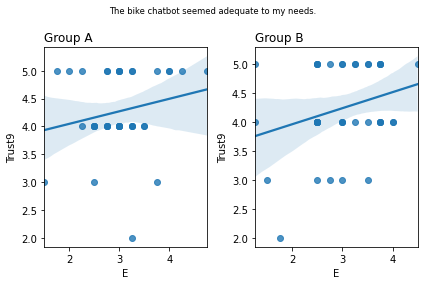

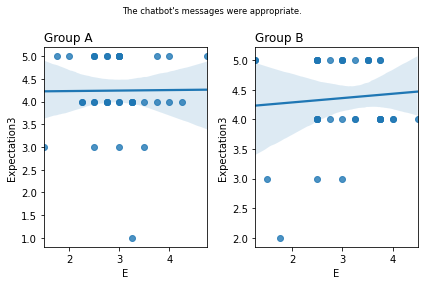

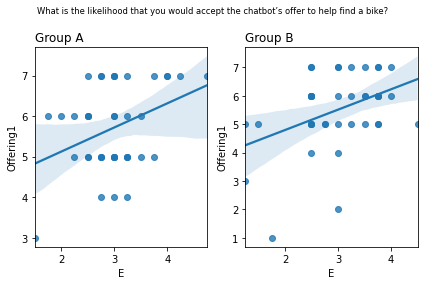

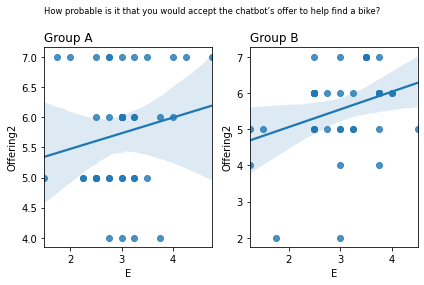

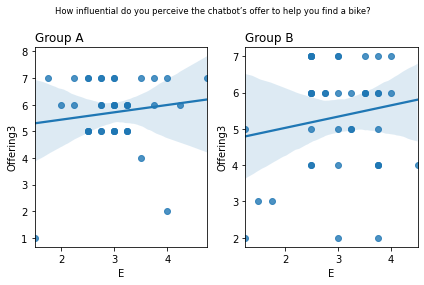

In [33]:
for q_num, q in survey_questions.iteritems():
    fig, ax = plt.subplots(1, 2)

    for i,group in enumerate(sorted(summary_numeric_survey_df.group.unique())):
        sub_df = summary_numeric_survey_df.query('group == @group')
        sns.regplot(x=sub_df['E'], y=sub_df[q_num], ax=ax[i])
        ax[i].set_title(group, loc='left')

    fig.suptitle(q, fontsize='small')
    fig.tight_layout()

    plt.show()

In [31]:
from scipy.stats import spearmanr
for q_num, q in survey_questions.iteritems():
    stat, p = spearmanr(
        (
            summary_numeric_survey_df
            .query('group == "Group A"')
            .iloc[:41,:]
            [q_num]
        ),
        (
            summary_numeric_survey_df
            .query('group == "Group B"')
            .iloc[:41,:]
            [q_num]
        )
    )
    print('stat=%.3f, p=%.3f' % (stat, p),q)

stat=0.346, p=0.027 The chatbot's messages met my expectations.
stat=0.342, p=0.029 The chatbot's messages corresponded to how I expected it to communicate with me.
stat=0.197, p=0.216 The bike chatbot seemed to care about me.
stat=0.117, p=0.467 The bike chatbot made me feel good.
stat=0.036, p=0.823 I believe the bike chatbot was honest with me.
stat=0.068, p=0.675 I believe the bike chatbot didn’t make false claims.
stat=0.139, p=0.385 I believe the bike chatbot is trustworthy.
stat=0.119, p=0.459 I trust the bike chatbot.
stat=0.292, p=0.064 The bike chatbot seemed adequate to my needs.
stat=0.008, p=0.963 The chatbot's messages were appropriate.
stat=0.029, p=0.855 What is the likelihood that you would accept the chatbot’s offer to help find a bike?
stat=0.029, p=0.856 How probable is it that you would accept the chatbot’s offer to help find a bike?
stat=0.126, p=0.434 How influential do you perceive the chatbot’s offer to help you find a bike?


## SPSS Files

Pandas can also load SPSS files 

In [202]:
#pip install pyreadstat

     |████████████████████████████████| 557 kB 804 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [205]:
#spss_df = pd.read_spss()

In [206]:
#spss_df

,distracting_Q85_1,disturbing_Q85_2,forced_Q85_3,interfering_Q85_4,intrusive_Q85_5,invasive_Q85_6,obtrusive_Q85_7,politely_Q232,formally_Q233,helpful_Q236,...,feelhappy_Q181,feelsad_Q182,gender_Q70,age_Q80_4,Pfizer_Q71,type,perceived_intrusiveness,perceived_helpfulness,manipulation,involvement
0,5.0,7.0,6.0,7.0,6.0,7.0,6.0,7.0,6.0,7.0,...,7.0,7.0,1.0,46.0,2.0,FL_265,6.285714,10.000000,6.5,7.0
1,5.0,6.0,7.0,6.0,5.0,6.0,7.0,6.0,7.0,6.0,...,7.0,6.0,1.0,49.0,2.0,FL_265,6.000000,9.333333,6.5,6.6
2,5.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,3.0,2.0,...,6.0,2.0,1.0,41.0,2.0,FL_265,5.714286,5.000000,3.5,6.2
3,3.0,4.0,6.0,7.0,5.0,6.0,4.0,5.0,5.0,6.0,...,5.0,3.0,1.0,35.0,2.0,FL_265,5.000000,8.666667,5.0,5.0
4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,4.0,2.0,...,5.0,2.0,1.0,35.0,2.0,FL_265,7.000000,5.000000,4.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,3.0,2.0,3.0,2.0,3.0,4.0,3.0,2.0,3.0,4.0,...,7.0,2.0,2.0,34.0,2.0,FL_307,2.857143,6.666667,2.5,6.0
232,6.0,5.0,6.0,6.0,6.0,6.0,6.0,4.0,2.0,1.0,...,3.0,4.0,1.0,27.0,2.0,FL_307,5.857143,2.000000,3.0,7.0
233,2.0,1.0,2.0,2.0,6.0,6.0,6.0,3.0,2.0,2.0,...,7.0,1.0,2.0,35.0,2.0,FL_307,3.571429,5.000000,2.5,7.0
234,7.0,6.0,7.0,7.0,7.0,6.0,7.0,1.0,1.0,1.0,...,2.0,3.0,1.0,24.0,2.0,FL_307,6.714286,2.000000,1.0,4.4
